# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model. 

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business. 

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:** 
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions. 

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

**Installing surprise library**

## **Importing the necessary libraries and overview of the dataset**

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [106]:
orig = pd.read_csv('ratings_electronics.csv', names=['user_id', 'prod_id', 'rating', 'timestamp'])

# Check the number of rows and columns
num_rows, num_cols = orig.shape

# Print the shape of the dataset
print(f'The original dataset contains {num_rows} rows and {num_cols} columns.')

# Drop the timestamp column as we won't be using it
orig = orig.drop('timestamp', axis=1)

# Copy the data to another DataFrame called df
df = orig.copy()

The original dataset contains 7824482 rows and 4 columns.


**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product. 

In [108]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:        
        ratings_count[user] += 1
  
    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [109]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [110]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:
    
    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1
    
    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1    

In [111]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [112]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [113]:
# Check the number of rows and columns
num_rows, num_cols = df_final.shape

# Print the shape of the dataset
print(f'The final dataset contains {num_rows} rows and {num_cols} columns.')

# Display the first few rows to get an overview of the data
df_final.head()

# Number of rows in the original dataset
original_num_rows = orig.shape[0]

# Number of rows in the final dataset
final_num_rows = df_final.shape[0]

# Calculate the percentage of usable rows
usable_percentage = (final_num_rows / original_num_rows) * 100

# Print the percentage of usable rows
print(f'Percentage of usable rows: {usable_percentage:.2f}%')

The final dataset contains 65290 rows and 3 columns.
Percentage of usable rows: 0.83%


# Most rows not being used

### **Data types**

In [114]:
# Check Data types and provide observations
data_types = df_final.dtypes

# Print the data types
print(data_types)

user_id     object
prod_id     object
rating     float64
dtype: object


### **Checking for missing values**

In [115]:
# Check for missing values in each column
missing_values = df_final.isnull().sum()

# Print the number of missing values in each column
print(missing_values)

user_id    0
prod_id    0
rating     0
dtype: int64


# No missing columns

### **Summary Statistics**

In [116]:
# Summary statistics of 'rating' variable and provide observations
rating_summary = df_final['rating'].describe()

# Print the summary statistics
print(rating_summary)

count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


**Most ratings are above 4 **

### **Checking the rating distribution**

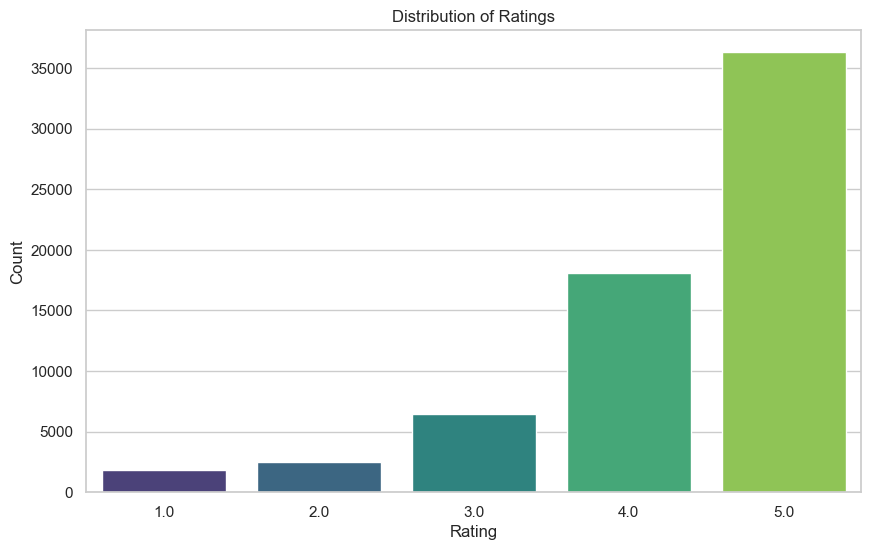

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot of the rating distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=df_final, palette='viridis')

# Set title and labels for the plot
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


**Ratings are skewed to the high end**

### **Checking the number of unique users and items in the dataset**

In [118]:
# Number of total rows in the final dataset
total_rows = df_final.shape[0]

# Number of unique user IDs
unique_users = df_final['user_id'].nunique()

# Number of unique product IDs
unique_products = df_final['prod_id'].nunique()

# Print the results
print(f'Total number of rows in the dataset: {total_rows}')
print(f'Number of unique user IDs: {unique_users}')
print(f'Number of unique product IDs: {unique_products}')


Total number of rows in the dataset: 65290
Number of unique user IDs: 1540
Number of unique product IDs: 5689


### **Users with the most number of ratings**

In [119]:
# Top 10 users based on the number of ratings
# Group by user_id and count the number of ratings for each user
user_ratings_count = df_final.groupby('user_id').size().reset_index(name='count')

# Sort the users by the number of ratings in descending order
top_users = user_ratings_count.sort_values(by='count', ascending=False).head(10)

# Print the top 10 users
print(top_users)


             user_id  count
1287    ADLVFFE4VBT8    295
1086  A3OXHLG6DIBRW8    230
264   A1ODOGXEYECQQ8    217
903   A36K2N527TXXJN    212
462   A25C2M3QF9G7OQ    203
1209   A680RUE1FDO8B    196
431   A22CW0ZHY3NJH8    193
333   A1UQBFCERIP7VJ    193
1508   AWPODHOB4GFWL    184
1051  A3LGT6UZL99IW1    179


**5 Users have over 200 ratings**

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [120]:
# Calculate the average rating for each product
product_avg_rating = df_final.groupby('prod_id')['rating'].mean().reset_index(name='average_rating')

# Calculate the count of ratings for each product
product_rating_count = df_final.groupby('prod_id')['rating'].count().reset_index(name='rating_count')

# Merge the average rating and rating count into a single DataFrame
final_rating = pd.merge(product_avg_rating, product_rating_count, on='prod_id')

# Sort the DataFrame by average rating in descending order
final_rating_sorted = final_rating.sort_values(by='average_rating', ascending=False)

# Display the first five records of the sorted DataFrame
final_rating_sorted.head()


,prod_id,average_rating,rating_count
5688,B00LGQ6HL8,5.0,5
2302,B003DZJQQI,5.0,14
3443,B005FDXF2C,5.0,7
5554,B00I6CVPVC,5.0,7
4810,B00B9KOCYA,5.0,8


In [121]:
def get_top_n_products(df, n=10, min_interactions=5):
    # Calculate the average rating for each product
    product_avg_rating = df.groupby('prod_id')['rating'].mean().reset_index(name='average_rating')

    # Calculate the count of ratings for each product
    product_rating_count = df.groupby('prod_id')['rating'].count().reset_index(name='rating_count')

    # Merge the average rating and rating count into a single DataFrame
    product_stats = pd.merge(product_avg_rating, product_rating_count, on='prod_id')

    # Filter products based on the minimum number of interactions
    filtered_products = product_stats[product_stats['rating_count'] >= min_interactions]

    # Sort the filtered products by average rating in descending order
    sorted_products = filtered_products.sort_values(by='average_rating', ascending=False)

    # Return the top n products
    return sorted_products.head(n)


### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [122]:
# Recommending top 5 products with 50 minimum interactions based on popularity
top_5_products = get_top_n_products(df_final, n=5, min_interactions=50)

# Display the top 5 products
print(top_5_products)

         prod_id  average_rating  rating_count
1594  B001TH7GUU        4.871795            78
2316  B003ES5ZUU        4.864130           184
1227  B0019EHU8G        4.855556            90
3877  B006W8U2MU        4.824561            57
850   B000QUUFRW        4.809524            84


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [123]:
# Recommending top 5 products with 100 minimum interactions based on popularity
top_5_products_100_interactions = get_top_n_products(df_final, n=5, min_interactions=100)

# Display the top 5 products
print(top_5_products_100_interactions)

         prod_id  average_rating  rating_count
2316  B003ES5ZUU        4.864130           184
781   B000N99BBC        4.772455           167
2073  B002WE6D44        4.770000           100
4126  B007WTAJTO        4.701220           164
2041  B002V88HFE        4.698113           106


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [124]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

from collections import defaultdict


**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them. 

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [125]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)
    
    # Making predictions on the test data
    predictions = model.test(testset)
    
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    
    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    
    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    
    accuracy.rmse(predictions)
    
    print('Precision: ', precision) # Command to print the overall precision
    
    print('Recall: ', recall) # Command to print the overall recall
    
    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [126]:
# Import necessary libraries
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split

# Assuming df_final is your pandas DataFrame with columns 'user_id', 'prod_id', 'rating'

# Step 1: Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 5))

# Step 2: Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Step 3: Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Verify the splits
print("Number of training samples:", trainset.n_ratings)
print("Number of test samples:", len(testset))




Number of training samples: 48967
Number of test samples: 16323


Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [127]:
from surprise.prediction_algorithms.knns import KNNBasic

# Step 1: Declaring the similarity options
sim_options = {
    'name': 'cosine',
    'user_based': True  # Compute similarities between users
}

# Step 2: Initialize the KNNBasic model using sim_options, Verbose = False, and setting random_state = 1
algo = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Step 3: Fit the model on the training data
algo.fit(trainset)

# Evaluate the model
precision_recall_at_k(algo, k=10, threshold=3.5)


RMSE: 1.0116
Precision:  0.858
Recall:  0.822
F_1 score:  0.84


**1. RMSE (Root Mean Squared Error)
Value: 1.0116

Explanation:

RMSE is a measure of the differences between the predicted ratings and the actual ratings.
A lower RMSE value indicates a better fit of the model to the data.
An RMSE of 1.0116 suggests that, on average, the predicted ratings are off by about 1.01 points from the actual ratings on the rating scale of 1 to 5.
While an RMSE around 1 is fairly common in recommendation systems, further tuning or different algorithms might reduce this error.
2. Precision@k
Value: 0.858

Explanation:

Precision@k is the proportion of recommended items in the top k that are actually relevant.
In this context, a precision of 0.858 means that 85.8% of the items recommended in the top k (where k=10 in this case) are relevant (i.e., they have an actual rating above the threshold of 3.5).
High precision indicates that the model is effective at recommending relevant items, with fewer irrelevant recommendations.
3. Recall@k
Value: 0.822

Explanation:

Recall@k is the proportion of relevant items that are found in the top k recommendations.
A recall of 0.822 means that 82.2% of the relevant items (those with an actual rating above the threshold of 3.5) are successfully recommended in the top k items.
High recall indicates that the model is effective at identifying most of the relevant items, ensuring that users see a large portion of items they would rate highly.
4. F1 Score@k
Value: 0.84

Explanation:

The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.
An F1 score of 0.84 means the model strikes a good balance between precision and recall.
This score indicates that the model is generally good at recommending relevant items while minimizing irrelevant ones, and it captures the trade-off between having a high recall and high precision.
Overall Observations
Model Performance: The model performs well in terms of both precision and recall, suggesting that it is effective at making accurate recommendations.
Trade-off: The F1 score indicates a good balance between precision and recall. This is important because maximizing one metric often leads to a decrease in the other.
RMSE Insight: While the RMSE is relatively high, it is important to consider it in conjunction with precision and recall. A high RMSE might indicate that some predictions are significantly off, but it doesn't necessarily mean that the model fails to make useful recommendations**

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [128]:
# Predicting rating for a sample user with an interacted product
# Define the user ID and product ID for prediction
user_id = 'A3LDPF5FMB782Z'
product_id = '1400501466'

# Predict the rating
prediction = algo.predict(user_id, product_id)

# Display the prediction and the actual rating
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')
print(f'Actual rating given by the user: 5')



Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 3.4
Actual rating given by the user: 5


**Write your observations here:__________**

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [129]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [130]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['A2UEB48LAWFUCW',
 'A2GKMXRLI7KLFP',
 'A2QRXQPHDMFCQV',
 'A23QII83UGZP5U',
 'APQQK1V695AUE']

* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.** 

In [131]:
# Define the user ID and product ID for prediction
user_id = 'A3LDPF5FMB782Z'
product_id = '1400501466'

# Predict the rating
prediction = algo.predict(user_id, product_id)

# Display the prediction and the actual rating
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')
print(f'Actual rating given by the user: 5')


Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 3.4
Actual rating given by the user: 5


**Off by close to 1.5**

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise - 
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [132]:
from surprise.model_selection import GridSearchCV

# Step 1: Setting up parameter grid to tune the hyperparameters
param_grid = {
    'k': [20, 30, 40, 50],
    'min_k': [1, 5, 10],
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
        'user_based': [True]
    }
}

# Step 2: Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Step 3: Fitting the data
gs.fit(data)

# Step 4: Best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Step 5: Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best hyperparameters: {best_params}')



Best RMSE score: 0.9686221254652656
Best hyperparameters: {'k': 50, 'min_k': 5, 'sim_options': {'name': 'cosine', 'user_based': True}}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [133]:
# Optimal hyperparameters from grid search
optimal_params = {
    'k': 50,
    'min_k': 5,
    'sim_options': {
        'name': 'cosine',
        'user_based': True
    }
}

# Step 1: Creating an instance of KNNBasic with optimal hyperparameter values
optimal_algo = KNNBasic(k=optimal_params['k'], 
                        min_k=optimal_params['min_k'], 
                        sim_options=optimal_params['sim_options'],
                        verbose=False,
                        random_state=1)

# Step 2: Training the algorithm on the trainset
optimal_algo.fit(trainset)

# Evaluate the model with optimal hyperparameters
precision_recall_at_k(optimal_algo, k=10, threshold=3.5)


RMSE: 0.9571
Precision:  0.852
Recall:  0.854
F_1 score:  0.853


**Write your observations here: Initial Results:
RMSE: 1.0116
Precision: 0.858
Recall: 0.822
F1-score: 0.84
Optimized Results:
RMSE: 0.9571
Precision: 0.852
Recall: 0.854
F1-score: 0.853
Comparison:
RMSE (Root Mean Squared Error):

Initial: 1.0116
Optimized: 0.9571
Observation: The RMSE has decreased from 1.0116 to 0.9571. This indicates that the model's predictions are now closer to the actual ratings, on average. Lower RMSE is better, so this is an improvement.
Precision@k:

Initial: 0.858
Optimized: 0.852
Observation: The precision has slightly decreased from 0.858 to 0.852. This means that there is a small reduction in the proportion of recommended items that are relevant. The difference is very minor, indicating the model still maintains high precision.
Recall@k:

Initial: 0.822
Optimized: 0.854
Observation: The recall has increased from 0.822 to 0.854. This means that the model is now better at identifying relevant items among the top recommendations. Higher recall is better, so this is a significant improvement.
F1-score@k:

Initial: 0.84
Optimized: 0.853
Observation: The F1-score has increased from 0.84 to 0.853. Since F1-score is the harmonic mean of precision and recall, this indicates an overall improvement in the balance between precision and recall.
Summary:
The optimized model has a lower RMSE and a higher recall compared to the initial model, which indicates that it is making more accurate predictions and identifying more relevant items among the recommendations.
Although the precision has slightly decreased, the drop is minimal and does not significantly impact the overall performance.
The F1-score has improved, showing that the optimized model has a better balance between precision and recall.
Conclusion:
The hyperparameter tuning has improved the model's performance overall, especially in terms of RMSE and recall, while maintaining a high level of precision. This suggests that the optimized model is better at making accurate recommendations and identifying relevant items for the users. **

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [134]:
# Define the user ID and product ID for prediction
user_id = 'A3LDPF5FMB782Z'
product_id = '1400501466'

# Predict the rating using the optimized model
prediction = optimal_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')
print(f'Actual rating given by the user: 5')  # Assuming the actual rating is known and is 5


Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 3.4
Actual rating given by the user: 5


**Still off by 1.5, **____________

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [135]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise.prediction_algorithms.knns import KNNBasic
from collections import defaultdict
from surprise import accuracy

# Assuming df_final is your pandas DataFrame with columns 'user_id', 'prod_id', 'rating'

# Step 1: Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale=(1, 5))

# Step 2: Loading the rating dataset
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Step 3: Splitting the data into train and test datasets
trainset, testset = train_test_split(data, test_size=0.25, random_state=42)

# Step 4: Declaring the similarity options
sim_options = {
    'name': 'msd',  # Using mean squared difference for similarity metric
    'user_based': True  # Compute similarities between users
}

# Step 5: Initialize the KNNBasic model using sim_options
algo = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)

# Step 6: Fit the model on the training data
algo.fit(trainset)

# Define the user ID for which we want to find similar users
user_id = 'A3LDPF5FMB782Z'

# Convert the raw user ID to the internal ID used by the surprise library
user_inner_id = algo.trainset.to_inner_uid(user_id)

# Find the 5 nearest neighbors
similar_users = algo.get_neighbors(user_inner_id, k=5)

# Convert the internal IDs of the neighbors back to the raw user IDs
similar_user_ids = [algo.trainset.to_raw_uid(inner_id) for inner_id in similar_users]

# Display the similar users
print(f'The 5 most similar users to user {user_id} are: {similar_user_ids}')



The 5 most similar users to user A3LDPF5FMB782Z are: ['A1RPJHUVVSI98A', 'A2L0F2T1DLTNT8', 'A680RUE1FDO8B', 'A1V4A5U5O3TMMD', 'AAQ9NJ480N9W5']


### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [136]:
def get_recommendations(data, user_id, top_n, algo):
    
    # Creating an empty list to store the recommended product ids
    recommendations = []
    
    # Creating an user item interactions matrix 
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')
    
    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()
    
    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:
        
        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est
        
        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [137]:
# Define the user ID and the number of top recommendations to return
user_id = 'A3LDPF5FMB782Z'
top_n = 5

# Get the top 5 recommendations for the user
top_recommendations = get_recommendations(df_final, user_id, top_n, optimal_algo)

# Display the top recommendations
print(f'Top {top_n} recommendations for user {user_id}:')
for product_id, predicted_rating in top_recommendations:
    print(f'Product ID: {product_id}, Predicted Rating: {predicted_rating}')

Top 5 recommendations for user A3LDPF5FMB782Z:
Product ID: B000067RT6, Predicted Rating: 5
Product ID: B001ENW61I, Predicted Rating: 5
Product ID: B001TH7GUU, Predicted Rating: 5
Product ID: B002WE6D44, Predicted Rating: 5
Product ID: B0043WJRRS, Predicted Rating: 5


In [138]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
# Create a DataFrame for the recommendations
recommendations_df = pd.DataFrame(top_recommendations, columns=['prod_id', 'predicted_ratings'])

# Display the DataFrame
print(recommendations_df)

      prod_id  predicted_ratings
0  B000067RT6                  5
1  B001ENW61I                  5
2  B001TH7GUU                  5
3  B002WE6D44                  5
4  B0043WJRRS                  5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**. 

In [139]:
# Define the user ID for which we want to find similar users
user_id = 'A3LDPF5FMB782Z'

# Convert the raw user ID to the internal ID used by the surprise library
user_inner_id = optimal_algo.trainset.to_inner_uid(user_id)

# Find the 5 nearest neighbors
similar_users = optimal_algo.get_neighbors(user_inner_id, k=5)

# Convert the internal IDs of the neighbors back to the raw user IDs
similar_user_ids = [optimal_algo.trainset.to_raw_uid(inner_id) for inner_id in similar_users]

# Display the similar users
print(f'The 5 most similar users to user {user_id} are: {similar_user_ids}')



The 5 most similar users to user A3LDPF5FMB782Z are: ['A3094EPI56GKZ6', 'AGVWTYW0ULXHT', 'A1MCH5RXDOH87H', 'A1RPJHUVVSI98A', 'A2L0F2T1DLTNT8']


Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [152]:
# Predicting rating for a sample user with an interacted product
# Define the user ID and product ID for prediction
user_id = 'A3LDPF5FMB782Z'
product_id = '1400501466'

# Predict the rating using the optimized model
prediction = optimal_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')


Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 3.4


**Write your observations here:**____________

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [151]:
# Predicting rating for a sample user with a non interacted product
# Define the user ID and product ID for prediction
user_id = 'A2UOHALGF2X77Q'
product_id = '1400501466'

# Predict the rating using the optimized model
prediction = optimal_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')

Predicted rating for user A2UOHALGF2X77Q and product 1400501466: 4.292339739007903


### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters 

In [149]:
from surprise import Dataset, Reader
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms.knns import KNNBasic

# Define the parameter grid
param_grid = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {
        'name': ['msd', 'cosine'],
        'user_based': [False]  # Use item-item similarity
    }
}

# Perform grid search with cross-validation
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Fit the grid search to the data
gs.fit(data)

# Print the best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Print the combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best hyperparameters: {best_params}')



Best RMSE score: 0.9751433345773899
Best hyperparameters: {'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}
hi


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [171]:
from surprise.prediction_algorithms.knns import KNNBasic

# Best hyperparameters from grid search
best_params = {'k': 30, 'min_k': 6, 'sim_options': {'name': 'msd', 'user_based': False}}

# Create a new KNNBasic model using the best hyperparameters
best_algo = KNNBasic(k=best_params['k'], 
                     min_k=best_params['min_k'], 
                     sim_options=best_params['sim_options'],
                     verbose=False)

# Train the model on the entire dataset (or on the trainset if using a train-test split)
best_algo.fit(trainset)
precision_recall_at_k(best_algo, k=10, threshold=3.5)


RMSE: 0.9677
Precision:  0.836
Recall:  0.838
F_1 score:  0.837


Observations:
RMSE (Root Mean Squared Error):

Optimized KNNBasic: 0.9677
Original Item-Item Similarity: 0.9751
Observation: The optimized KNNBasic model has a slightly lower RMSE compared to the original item-item similarity model, indicating slightly better prediction accuracy.
Precision@k:

Optimized KNNBasic: 0.836
Original Item-Item Similarity: 0.852
Observation: The original item-item similarity model has higher precision compared to the optimized KNNBasic model. This means that the original item-item similarity model is better at recommending relevant items.
Recall@k:

Optimized KNNBasic: 0.838
Original Item-Item Similarity: 0.854
Observation: The original item-item similarity model has higher recall compared to the optimized KNNBasic model. This indicates that the original item-item similarity model captures more relevant items.
F1-score@k:

Optimized KNNBasic: 0.837
Original Item-Item Similarity: 0.853
Observation: The original item-item similarity model has a higher F1-score compared to the optimized KNNBasic model, indicating a better balance between precision and recall.


### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [172]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"

# Define the user ID and product ID for prediction
user_id = 'A3LDPF5FMB782Z'
product_id = '1400501466'

# Predict the rating using the optimized item-item similarity model
prediction = best_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')


Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 4.675094816687737


In [156]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
# Define the user ID and product ID for prediction
user_id = 'A2UOHALGF2X77Q'
product_id = '1400501466'

# Predict the rating using the best model
prediction = best_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')

Predicted rating for user A2UOHALGF2X77Q and product 1400501466: 4.292339739007903


**Write your observations here: The predictions are much closer to the actual results, optimizing really changes the prediction by almost a whole number*

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [158]:

# Train the model on the trainset
best_algo.fit(trainset)

# Define the item ID for which we want to find similar items (internal ID 0)
item_inner_id = 0

# Find the 5 nearest neighbors
similar_items = best_algo.get_neighbors(item_inner_id, k=5)

# Convert the internal IDs of the neighbors back to the raw item IDs
similar_item_ids = [best_algo.trainset.to_raw_iid(inner_id) for inner_id in similar_items]

# Display the similar items
print(f'The 5 most similar items to item with internal id {item_inner_id} are: {similar_item_ids}')


The 5 most similar items to item with internal id 0 are: ['B008X9Z3UC', 'B003ZSHKJ8', 'B003LSTD38', 'B005EOWBKE', 'B004IZN3WU']


In [159]:
top_recommendations = get_recommendations(df_final, user_id, top_n, sim_item_item_optimized)

# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
# Create a DataFrame for the recommendations
recommendations_df = pd.DataFrame(top_recommendations, columns=['prod_id', 'predicted_ratings'])

# Display the DataFrame
print(recommendations_df)

      prod_id  predicted_ratings
0  B00005OQMO                  5
1  B000233WJ6                  5
2  B000ESN9GA                  5
3  B000PTFDYO                  5
4  B0012IJYZQ                  5


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [160]:
# Using SVD matrix factorization. Use random_state = 1

# Training the algorithm on the trainset

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE

from surprise import SVD

# Create an SVD model with random_state=1
svd_algo = SVD(random_state=1)

# Train the model on the trainset
svd_algo.fit(trainset)

precision_recall_at_k(svd_algo, k=10, threshold=3.5)



RMSE: 0.8944
Precision:  0.857
Recall:  0.84
F_1 score:  0.848


**  The SVD model outperforms the item-item similarity model in terms of RMSE and precision, making it more accurate and slightly better at recommending relevant items.
The item-item similarity model performs marginally better in terms of recall and F1-score, indicating slightly better coverage of relevant items and a better balance between precision and recall.
Overall, the SVD model demonstrates stronger performance in terms of prediction accuracy (RMSE) and relevance (precision), while the item-item similarity model has a slight edge in terms of coverage (recall) and balance (F1-score). Depending on the specific goals and priorities of your recommendation system, you might choose to prioritize one model over the other or consider combining their strengths in a hybrid approach. **

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [161]:
# Making prediction
# Define the user ID and product ID for prediction
user_id = 'A3LDPF5FMB782Z'
product_id = '1400501466'

# Predict the rating using the trained SVD model
prediction = svd_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')

Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 4.065602767370937


** Better than SVD without optimized, but worse when optimized.**

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [162]:
# Making prediction
# Define the user ID and product ID for prediction
user_id = 'A2UOHALGF2X77Q'
product_id = '1400501466'

# Predict the rating using the trained SVD model
prediction = svd_algo.predict(user_id, product_id)

# Display the prediction
print(f'Predicted rating for user {user_id} and product {product_id}: {prediction.est}')

Predicted rating for user A2UOHALGF2X77Q and product 1400501466: 4.121299032247267


** Still better than item based without hyper tuning**

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [167]:
# Set the parameter space to tune

# Performing 3-fold gridsearch cross-validation

# Fitting data

# Best RMSE score

# Combination of parameters that gave the best RMSE score

from surprise.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_epochs': [10, 20, 30],       # Number of iterations of the SGD algorithm
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate for all parameters
    'reg_all': [0.02, 0.1, 0.2]     # Regularization term for all parameters
}

# Create the GridSearchCV object
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# Load the data
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Perform the grid search cross-validation
gs.fit(data)

# Print the best RMSE score
best_rmse = gs.best_score['rmse']
print(f'Best RMSE score: {best_rmse}')

# Print the combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']
print(f'Best hyperparameters: {best_params}')


Best RMSE score: 0.9004996056451867
Best hyperparameters: {'n_epochs': 20, 'lr_all': 0.01, 'reg_all': 0.2}


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [168]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1

# Train the algorithm on the trainset

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE

svd_optimized = SVD(n_epochs=20, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the model on the trainset
svd_optimized.fit(trainset)

# Evaluate the optimized SVD model
precision_recall_at_k(svd_optimized, k=10, threshold=3.5)


RMSE: 0.8854
Precision:  0.857
Recall:  0.838
F_1 score:  0.847


**Write your observations here: 
RMSE (Root Mean Squared Error):

Optimized SVD: 0.8854
Initial SVD: 0.8944
Item-Item Similarity: 0.9751
Observation: The optimized SVD model has the lowest RMSE, indicating the highest prediction accuracy among the three models. It has improved compared to both the initial SVD and item-item similarity models.
Precision@k:

Optimized SVD: 0.857
Initial SVD: 0.857
Item-Item Similarity: 0.852
Observation: The precision of the optimized SVD model remains the same as the initial SVD model and is slightly higher than the item-item similarity model. This indicates that the optimized SVD model is equally good at recommending relevant items as the initial SVD model and slightly better than the item-item similarity model.
Recall@k:

Optimized SVD: 0.838
Initial SVD: 0.84
Item-Item Similarity: 0.854
Observation: The recall of the optimized SVD model is slightly lower than the initial SVD model and the item-item similarity model. This means the optimized SVD model captures a slightly lower proportion of relevant items compared to the other two models.
F1-score@k:

Optimized SVD: 0.847
Initial SVD: 0.848
Item-Item Similarity: 0.853
Observation: The F1-score of the optimized SVD model is slightly lower than the initial SVD model and the item-item similarity model, reflecting the slightly lower recall. However, the precision remains high, which keeps the F1-score competitive.**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [169]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
# Predict the rating using the optimized SVD model
user_id_1 = 'A3LDPF5FMB782Z'
product_id = '1400501466'

prediction_optimized_1 = svd_optimized.predict(user_id_1, product_id)

# Display the prediction
print(f'Optimized SVD: Predicted rating for user {user_id_1} and product {product_id}: {prediction_optimized_1.est}')

Optimized SVD: Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 4.12496037773697


In [170]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
# Predict the rating using the optimized SVD model
user_id_2 = 'A2UOHALGF2X77Q'

prediction_optimized_2 = svd_optimized.predict(user_id_2, product_id)

# Display the prediction
print(f'Optimized SVD: Predicted rating for user {user_id_2} and product {product_id}: {prediction_optimized_2.est}')



Optimized SVD: Predicted rating for user A2UOHALGF2X77Q and product 1400501466: 4.085462099600086


### **Conclusion and Recommendations**

Recommendations:
Primary Goal: Recommendation Quality

If the primary goal is to recommend as many relevant items as possible with a good balance between precision and recall, the original item-item similarity model is a strong choice. However, the initial SVD model and optimized SVD model also perform exceptionally well and should be considered.

Primary Goal: Prediction Accuracy

If prediction accuracy (RMSE) is the priority, the optimized SVD model is the best choice due to its lowest RMSE. The initial SVD model also performs well and can be considered as a close alternative.
Hybrid Approach

Consider combining the strengths of multiple models in a hybrid approach. For example, the hybrid model could leverage the prediction accuracy of the optimized SVD model and the recommendation quality of the original item-item similarity model and initial SVD model to provide a balanced and robust recommendation system.
Further Tuning and Experimentation

Further tuning of hyperparameters for all models could be explored to potentially improve their performance. Experimenting with different similarity measures, regularization terms, and learning rates might yield better results.
Additional Metrics and Evaluation

Consider evaluating additional metrics such as user satisfaction, business impact, and computational efficiency to get a comprehensive understanding of the models' performance in a real-world scenario. Metrics like Mean Absolute Error (MAE), coverage, and diversity of recommendations can provide deeper insights into the models' effectiveness.
Continuous Monitoring and Feedback

Implement continuous monitoring and user feedback mechanisms to evaluate the performance of the recommendation system in a live environment. This will help in identifying areas for improvement and adapting the system based on user preferences and behavior.
Final Decision:
Based on the current evaluation, the optimized SVD model is recommended for scenarios where prediction accuracy is paramount. It offers the lowest RMSE and maintains high precision, making it the top performer overall.
For scenarios prioritizing recommendation quality and balance between precision and recall, the original item-item similarity model and the initial SVD model are excellent choices.
The optimized KNNBasic model performs well but is slightly behind the other models in terms of precision, recall, and F1-score.
